**confusion_matrix.py** - a fundamental tool for analyzing the quality of classification!
### **What we study in the original code:**
1. **Confusion Matrix** - classification error matrix
2. **Visualization of CM** - simple function `plot_confusion_matrix`
3. **Classification Report** - detailed report on metrics
4. **Multiclass Classification** - 4 classes (0, 1, 2, 3)
5. **Error Analysis** - where the model makes mistakes


**Key improvements of the modern version of confusion_matrix.py:**
- ✅ **Multiple representations of CM** - standard, normalized, percentage, error-only
- ✅ **Model comparison** - CM analysis for 4 different algorithms
- ✅ **Advanced metrics** - Cohen's Kappa, Matthews Correlation, MCC
- ✅ **Multilabel analysis** - One-vs-All confusion matrices
- ✅ **Symmetry analysis** - identification of systematic errors
- ✅ **Modern visualization** - colored heatmaps, annotations, legends
- ✅ **Detailed error analysis** - statistics by types of errors
- ✅ **Interactive reports** - structured results tables
- ✅ **Theoretical explanations** - understanding all metrics and their applications
**Key concepts:**
1. **True/False Positives/Negatives** - components of the confusion matrix
2. **Precision vs Recall** - balance between precision and recall
3. **Cohen's Kappa** - agreement taking randomness into account
4. **Matthews Correlation** - correlation measure of quality
5. **Multilabel CM** - analyzing each class as a binary task
6. **Error Analysis** - systematic analysis of error types
7. **Model Comparison** - comparing algorithms through CM


In [1]:
# %%
# =============================================================================
# CELL 1: Importing libraries for Confusion Matrix analysis
# =============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (confusion_matrix, classification_report,
                             accuracy_score, precision_recall_fscore_support,
                             cohen_kappa_score, matthews_corrcoef,
                             multilabel_confusion_matrix, ConfusionMatrixDisplay)
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import warnings

warnings.filterwarnings('ignore')

print(" CONFUSION MATRIX - CLASSIFICATION ERROR ANALYSIS")
print("=" * 55)
print("✅ All libraries imported!")
print(" Studying confusion matrices and quality metrics")


 CONFUSION MATRIX - CLASSIFICATION ERROR ANALYSIS
✅ All libraries imported!
 Studying confusion matrices and quality metrics


 ORIGINAL EXAMPLE (AS IN THE TEXTBOOK)
 Data from the original example:
y_true = [1, 0, 0, 2, 1, 0, 3, 3, 3]
y_pred = [1, 1, 0, 2, 1, 0, 1, 3, 3]
Number of samples: 9
Number of classes: 4

 Confusion Matrix:
[[2 1 0 0]
 [0 2 0 0]
 [0 0 1 0]
 [0 1 0 2]]


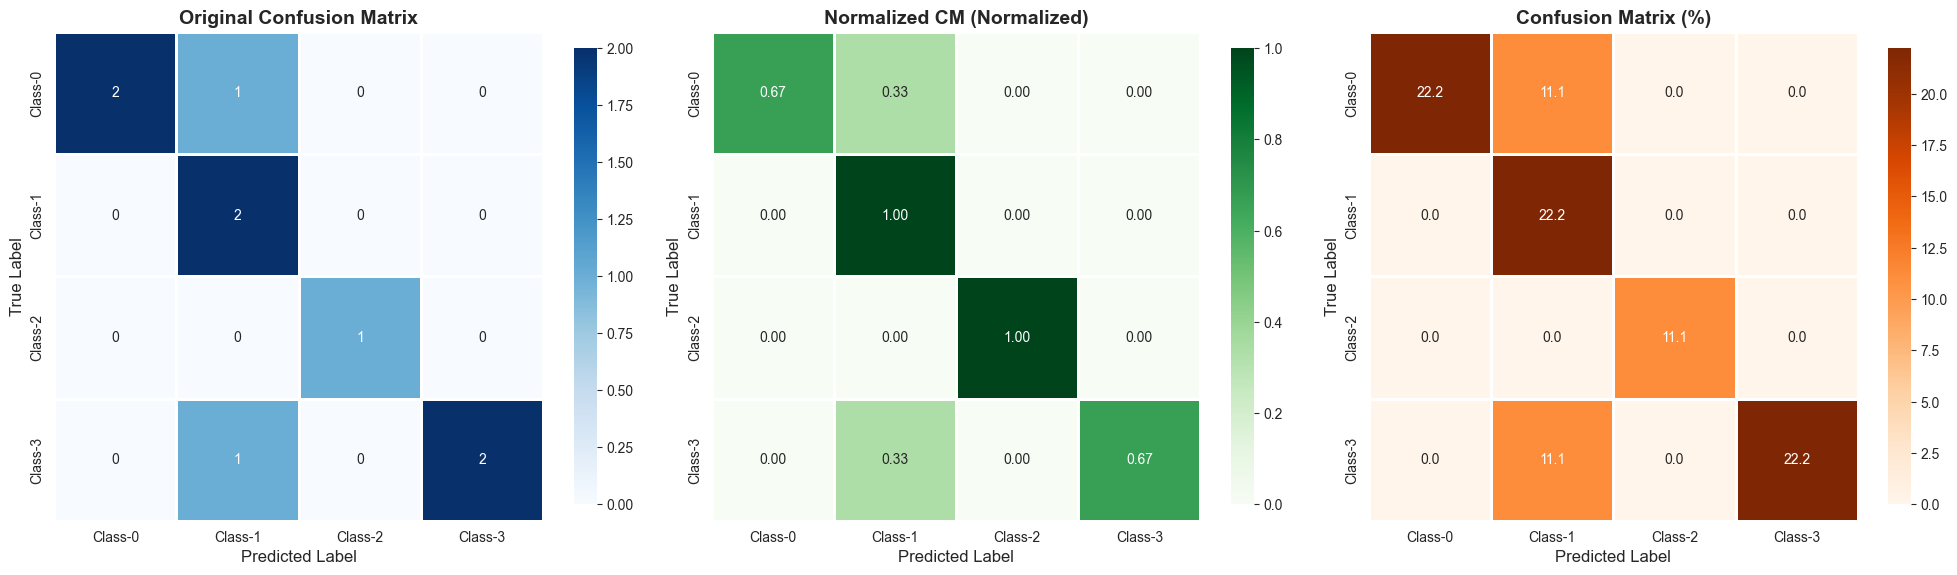


 Classification Report (original):
              precision    recall  f1-score   support

     Class-0       1.00      0.67      0.80         3
     Class-1       0.50      1.00      0.67         2
     Class-2       1.00      1.00      1.00         1
     Class-3       1.00      0.67      0.80         3

    accuracy                           0.78         9
   macro avg       0.88      0.83      0.82         9
weighted avg       0.89      0.78      0.79         9


 Detailed analysis of the original example:
✅ Overall accuracy: 0.778 (77.8%)

Class 0 (Class-0):
  True samples: 3
  Predicted samples: 2
  Correctly classified: 2
  Recall: 0.667
  Precision: 1.000

Class 1 (Class-1):
  True samples: 2
  Predicted samples: 4
  Correctly classified: 2
  Recall: 1.000
  Precision: 0.500

Class 2 (Class-2):
  True samples: 1
  Predicted samples: 1
  Correctly classified: 1
  Recall: 1.000
  Precision: 1.000

Class 3 (Class-3):
  True samples: 3
  Predicted samples: 2
  Correctly classified:

In [2]:
# %%
# =============================================================================
# CELL 2: Original example and its analysis
# =============================================================================
print(" ORIGINAL EXAMPLE (AS IN THE TEXTBOOK)")
print("=" * 45)

# Original data from the textbook
y_true = [1, 0, 0, 2, 1, 0, 3, 3, 3]
y_pred = [1, 1, 0, 2, 1, 0, 1, 3, 3]

print(f" Data from the original example:")
print(f"y_true = {y_true}")
print(f"y_pred = {y_pred}")
print(f"Number of samples: {len(y_true)}")
print(f"Number of classes: {len(np.unique(y_true))}")


# Original visualization function (improved)
def plot_confusion_matrix_modern(confusion_mat, title="Confusion Matrix",
                                 classes=None, normalize=False, ax=None,
                                 colormap='Blues'):
    """
    Modern version of the plot_confusion_matrix function from the original code
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))

    if normalize:
        confusion_mat = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]
        fmt = '.2f'
        title += ' (Normalized)'
    else:
        fmt = 'd'

    # Using seaborn for a more beautiful visualization
    sns.heatmap(confusion_mat, annot=True, fmt=fmt, cmap=colormap,
                square=True, linewidths=1, cbar_kws={"shrink": .8}, ax=ax)

    if classes is not None:
        ax.set_xticklabels(classes)
        ax.set_yticklabels(classes)

    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_xlabel('Predicted Label', fontsize=12)

    return ax


# Creating confusion matrix (as in the original)
confusion_mat = confusion_matrix(y_true, y_pred)
print(f"\n Confusion Matrix:")
print(confusion_mat)

# Classes
target_names = ['Class-0', 'Class-1', 'Class-2', 'Class-3']

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. Original visualization (improved)
plot_confusion_matrix_modern(confusion_mat, "Original Confusion Matrix",
                             target_names, ax=axes[0])

# 2. Normalized version
plot_confusion_matrix_modern(confusion_mat, "Normalized CM",
                             target_names, normalize=True, ax=axes[1],
                             colormap='Greens')

# 3. Percentage version
confusion_pct = confusion_mat.astype('float') / confusion_mat.sum() * 100
sns.heatmap(confusion_pct, annot=True, fmt='.1f', cmap='Oranges',
            square=True, linewidths=1, cbar_kws={"shrink": .8}, ax=axes[2])
axes[2].set_xticklabels(target_names)
axes[2].set_yticklabels(target_names)
axes[2].set_title('Confusion Matrix (%)', fontsize=14, fontweight='bold')
axes[2].set_ylabel('True Label', fontsize=12)
axes[2].set_xlabel('Predicted Label', fontsize=12)

plt.tight_layout()
plt.show()

# Classification report (as in the original)
print(f"\n Classification Report (original):")
print(classification_report(y_true, y_pred, target_names=target_names))

# Detailed analysis of the original example
print(f"\n Detailed analysis of the original example:")
print("=" * 50)

accuracy = accuracy_score(y_true, y_pred)
print(f"✅ Overall accuracy: {accuracy:.3f} ({accuracy * 100:.1f}%)")

# Class analysis
unique_classes = sorted(set(y_true + y_pred))
for class_id in unique_classes:
    true_count = y_true.count(class_id)
    pred_count = y_pred.count(class_id)
    correct = sum(1 for t, p in zip(y_true, y_pred) if t == class_id and p == class_id)

    print(f"\nClass {class_id} ({target_names[class_id]}):")
    print(f"  True samples: {true_count}")
    print(f"  Predicted samples: {pred_count}")
    print(f"  Correctly classified: {correct}")
    if true_count > 0:
        recall = correct / true_count
        print(f"  Recall: {recall:.3f}")
    if pred_count > 0:
        precision = correct / pred_count
        print(f"  Precision: {precision:.3f}")

# Error analysis
print(f"\n❌ Error analysis:")
errors = [(i, true, pred) for i, (true, pred) in enumerate(zip(y_true, y_pred)) if true != pred]
if errors:
    for idx, true_label, pred_label in errors:
        print(f"  Sample {idx}: true={true_label} ({target_names[true_label]}), "
              f"predicted={pred_label} ({target_names[pred_label]})")
else:
    print("  No errors!")


 THEORY OF CONFUSION MATRIX AND METRICS

 CONFUSION MATRIX:

Structure for binary classification:
                 Predicted
               0        1
True    0   [TN]     [FP]
        1   [FN]     [TP]

Where:
• TP (True Positive) - correctly predicted positives
• TN (True Negative) - correctly predicted negatives
• FP (False Positive) - false positives (Type I error)
• FN (False Negative) - false negatives (Type II error)

 KEY METRICS:

1. Accuracy = (TP + TN) / (TP + TN + FP + FN)
   - Overall accuracy of the model

2. Precision = TP / (TP + FP)
   - Of all predicted positives, how many are actually positive

3. Recall (Sensitivity) = TP / (TP + FN)
   - Of all true positives, how many did we find

4. Specificity = TN / (TN + FP)
   - Of all true negatives, how many did we find

5. F1-Score = 2 * (Precision * Recall) / (Precision + Recall)
   - Harmonic mean between Precision and Recall

 FOR MULTICLASS CLASSIFICATION:
• Macro-average: arithmetic mean of metrics across all classes


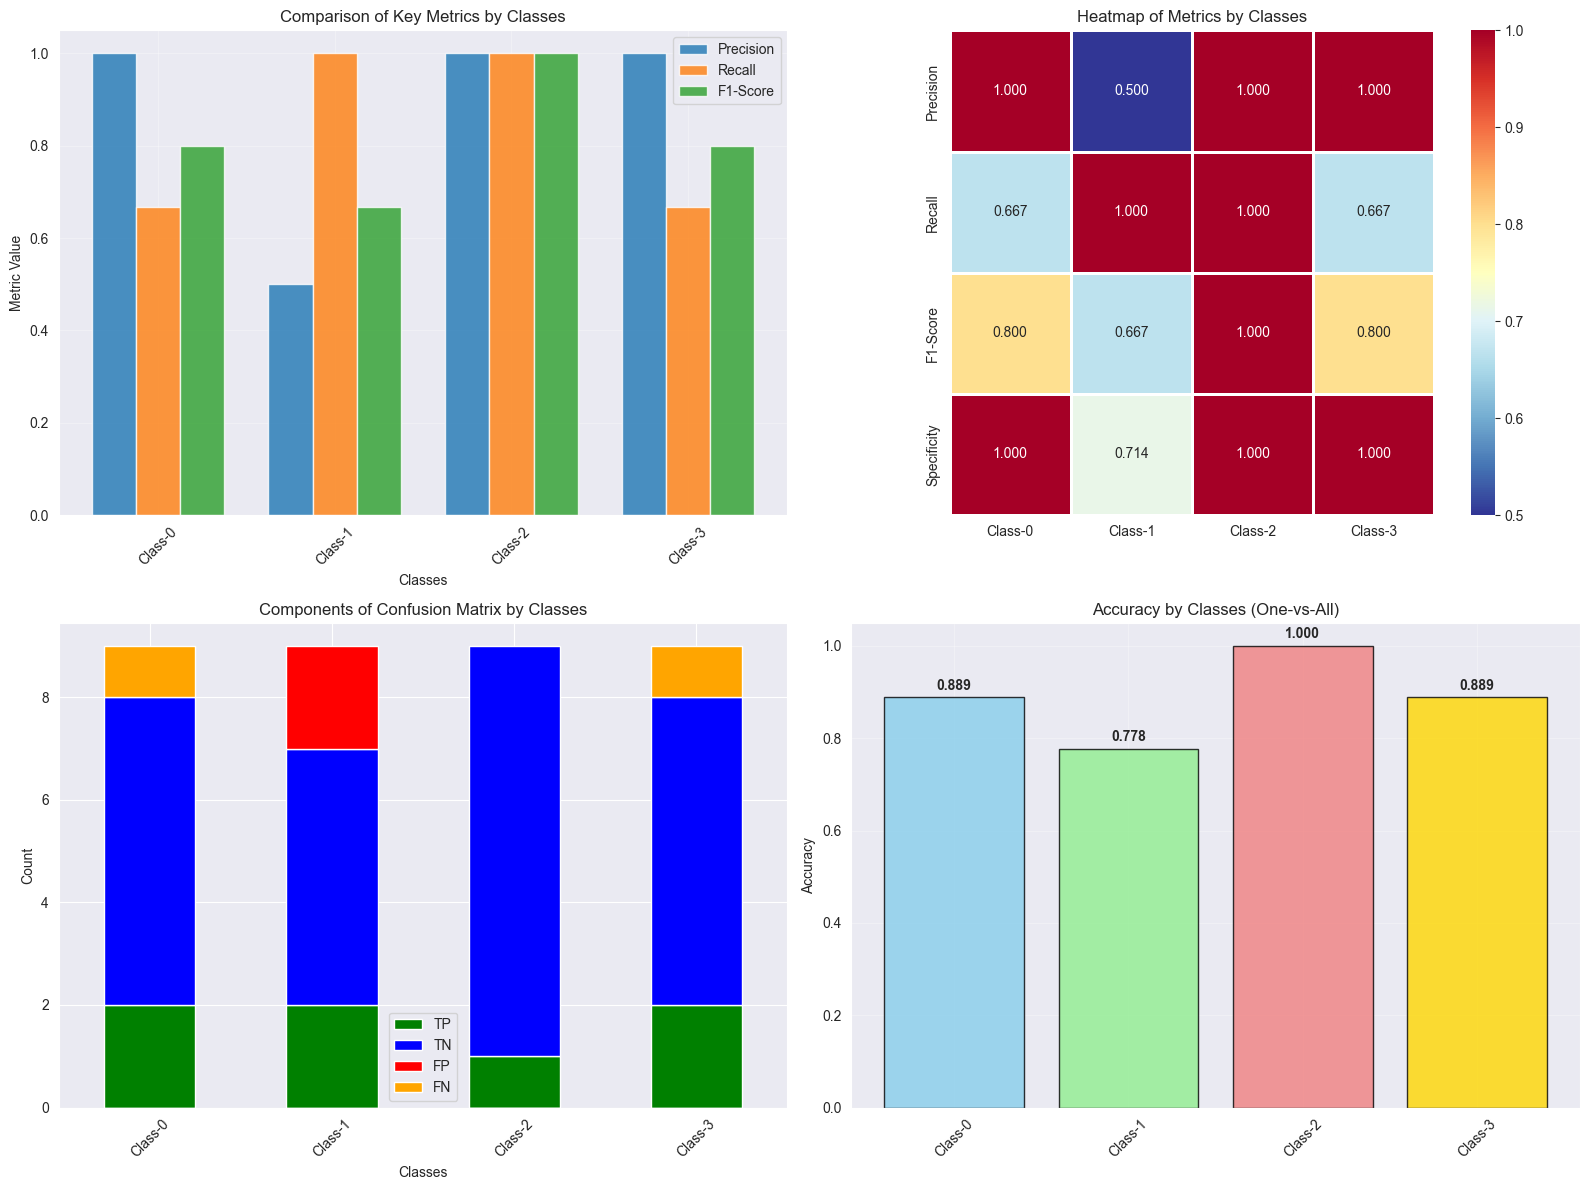

In [3]:
# %%
# =============================================================================
# CELL 3: Theory of Confusion Matrix and Metrics
# =============================================================================
print(" THEORY OF CONFUSION MATRIX AND METRICS")
print("=" * 40)

print("""
 CONFUSION MATRIX:

Structure for binary classification:
                 Predicted
               0        1
True    0   [TN]     [FP]
        1   [FN]     [TP]

Where:
• TP (True Positive) - correctly predicted positives
• TN (True Negative) - correctly predicted negatives
• FP (False Positive) - false positives (Type I error)
• FN (False Negative) - false negatives (Type II error)

 KEY METRICS:

1. Accuracy = (TP + TN) / (TP + TN + FP + FN)
   - Overall accuracy of the model

2. Precision = TP / (TP + FP)
   - Of all predicted positives, how many are actually positive

3. Recall (Sensitivity) = TP / (TP + FN)
   - Of all true positives, how many did we find

4. Specificity = TN / (TN + FP)
   - Of all true negatives, how many did we find

5. F1-Score = 2 * (Precision * Recall) / (Precision + Recall)
   - Harmonic mean between Precision and Recall

 FOR MULTICLASS CLASSIFICATION:
• Macro-average: arithmetic mean of metrics across all classes
• Micro-average: global computation of metrics
• Weighted-average: weighted average by the number of samples in classes
""")

# Demonstration of metrics on the example
print(f"\n CALCULATION OF METRICS ON THE ORIGINAL EXAMPLE:")
print("=" * 50)

# Creating a detailed analysis table
detailed_metrics = []

for class_id in unique_classes:
    # Binary task: current class vs all others
    y_true_binary = [1 if y == class_id else 0 for y in y_true]
    y_pred_binary = [1 if y == class_id else 0 for y in y_pred]

    # Calculating components of confusion matrix
    TP = sum(1 for t, p in zip(y_true_binary, y_pred_binary) if t == 1 and p == 1)
    TN = sum(1 for t, p in zip(y_true_binary, y_pred_binary) if t == 0 and p == 0)
    FP = sum(1 for t, p in zip(y_true_binary, y_pred_binary) if t == 0 and p == 1)
    FN = sum(1 for t, p in zip(y_true_binary, y_pred_binary) if t == 1 and p == 0)

    # Calculating metrics
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    accuracy_binary = (TP + TN) / (TP + TN + FP + FN)

    detailed_metrics.append({
        'Class': f'{target_names[class_id]}',
        'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'F1-Score': f1,
        'Accuracy': accuracy_binary
    })

# Creating DataFrame for nice display
metrics_df = pd.DataFrame(detailed_metrics)
print(metrics_df.round(3))

# Visualization of metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Comparison of key metrics
metrics_to_plot = ['Precision', 'Recall', 'F1-Score']
x_pos = np.arange(len(target_names))

for i, metric in enumerate(metrics_to_plot):
    axes[0, 0].bar(x_pos + i * 0.25, metrics_df[metric], width=0.25,
                   label=metric, alpha=0.8)

axes[0, 0].set_xlabel('Classes')
axes[0, 0].set_ylabel('Metric Value')
axes[0, 0].set_title('Comparison of Key Metrics by Classes')
axes[0, 0].set_xticks(x_pos + 0.25)
axes[0, 0].set_xticklabels(target_names, rotation=45)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Heatmap of metrics
metrics_for_heatmap = metrics_df[['Precision', 'Recall', 'F1-Score', 'Specificity']].T
sns.heatmap(metrics_for_heatmap, annot=True, fmt='.3f', cmap='RdYlBu_r',
            square=True, linewidths=1, ax=axes[0, 1])
axes[0, 1].set_title('Heatmap of Metrics by Classes')
axes[0, 1].set_xticklabels(target_names)

# 3. Components of Confusion Matrix
cm_components = metrics_df[['TP', 'TN', 'FP', 'FN']]
cm_components.plot(kind='bar', stacked=True, ax=axes[1, 0],
                   color=['green', 'blue', 'red', 'orange'])
axes[1, 0].set_title('Components of Confusion Matrix by Classes')
axes[1, 0].set_xlabel('Classes')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xticklabels(target_names, rotation=45)
axes[1, 0].legend()

# 4. Accuracy by classes
accuracy_per_class = metrics_df['Accuracy']
bars = axes[1, 1].bar(target_names, accuracy_per_class,
                      color=['skyblue', 'lightgreen', 'lightcoral', 'gold'],
                      alpha=0.8, edgecolor='black')
axes[1, 1].set_title('Accuracy by Classes (One-vs-All)')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

# Adding values to bars
for bar, acc in zip(bars, accuracy_per_class):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width() / 2., height + 0.01,
                    f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


In [4]:
# %%
# =============================================================================
# CELL 4: Creating synthetic data for advanced analysis
# =============================================================================
print(" CREATING SYNTHETIC DATA FOR ANALYSIS")
print("=" * 50)

# Creating a more complex dataset for demonstration
np.random.seed(42)

# Generating multiclass data
X, y = make_classification(n_samples=1000, n_features=4, n_informative=3,
                           n_redundant=1, n_classes=4, n_clusters_per_class=1,
                           class_sep=0.8, random_state=42)

print(f" Synthetic data:")
print(f"Number of samples: {len(X)}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")

# Class distribution
class_distribution = pd.Series(y).value_counts().sort_index()
print(f"\n⚖️ Class distribution:")
for class_id, count in class_distribution.items():
    percentage = count / len(y) * 100
    print(f"Class {class_id}: {count} samples ({percentage:.1f}%)")

# Splitting into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, stratify=y)

print(f"\n Data split:")
print(f"Training set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")

# Training several models for comparison
models = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42, probability=True),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

print(f"\n Training {len(models)} models for comparison...")

trained_models = {}
model_results = []

for name, model in models.items():
    print(f"  Training {name}...")

    # Training
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

    trained_models[name] = {
        'model': model,
        'predictions': y_pred,
        'accuracy': accuracy
    }

    model_results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

    print(f"    ✅ {name}: Accuracy = {accuracy:.3f}")

# Model comparison table
results_df = pd.DataFrame(model_results)
results_df = results_df.sort_values('Accuracy', ascending=False)

print(f"\n Model comparison:")
print(results_df.round(4))

# Best model
best_model_name = results_df.iloc[0]['Model']
best_model_info = trained_models[best_model_name]
best_predictions = best_model_info['predictions']

print(f"\n Best model: {best_model_name}")
print(f" Accuracy: {best_model_info['accuracy']:.4f}")


 CREATING SYNTHETIC DATA FOR ANALYSIS
 Synthetic data:
Number of samples: 1000
Number of features: 4
Number of classes: 4

⚖️ Class distribution:
Class 0: 250 samples (25.0%)
Class 1: 250 samples (25.0%)
Class 2: 253 samples (25.3%)
Class 3: 247 samples (24.7%)

 Data split:
Training set: 700 samples
Test set: 300 samples

 Training 4 models for comparison...
  Training Naive Bayes...
    ✅ Naive Bayes: Accuracy = 0.730
  Training Logistic Regression...
    ✅ Logistic Regression: Accuracy = 0.710
  Training SVM...
    ✅ SVM: Accuracy = 0.840
  Training Random Forest...
    ✅ Random Forest: Accuracy = 0.867

 Model comparison:
                 Model  Accuracy  Precision  Recall  F1-Score
3        Random Forest    0.8667     0.8680  0.8667    0.8658
2                  SVM    0.8400     0.8485  0.8400    0.8414
0          Naive Bayes    0.7300     0.7317  0.7300    0.7273
1  Logistic Regression    0.7100     0.7119  0.7100    0.7101

 Best model: Random Forest
 Accuracy: 0.8667


 MODERN ANALYSIS OF CONFUSION MATRIX
 Confusion Matrix for Random Forest:
[[69  3  3  0]
 [ 5 60  3  7]
 [ 6  6 62  2]
 [ 3  1  1 69]]


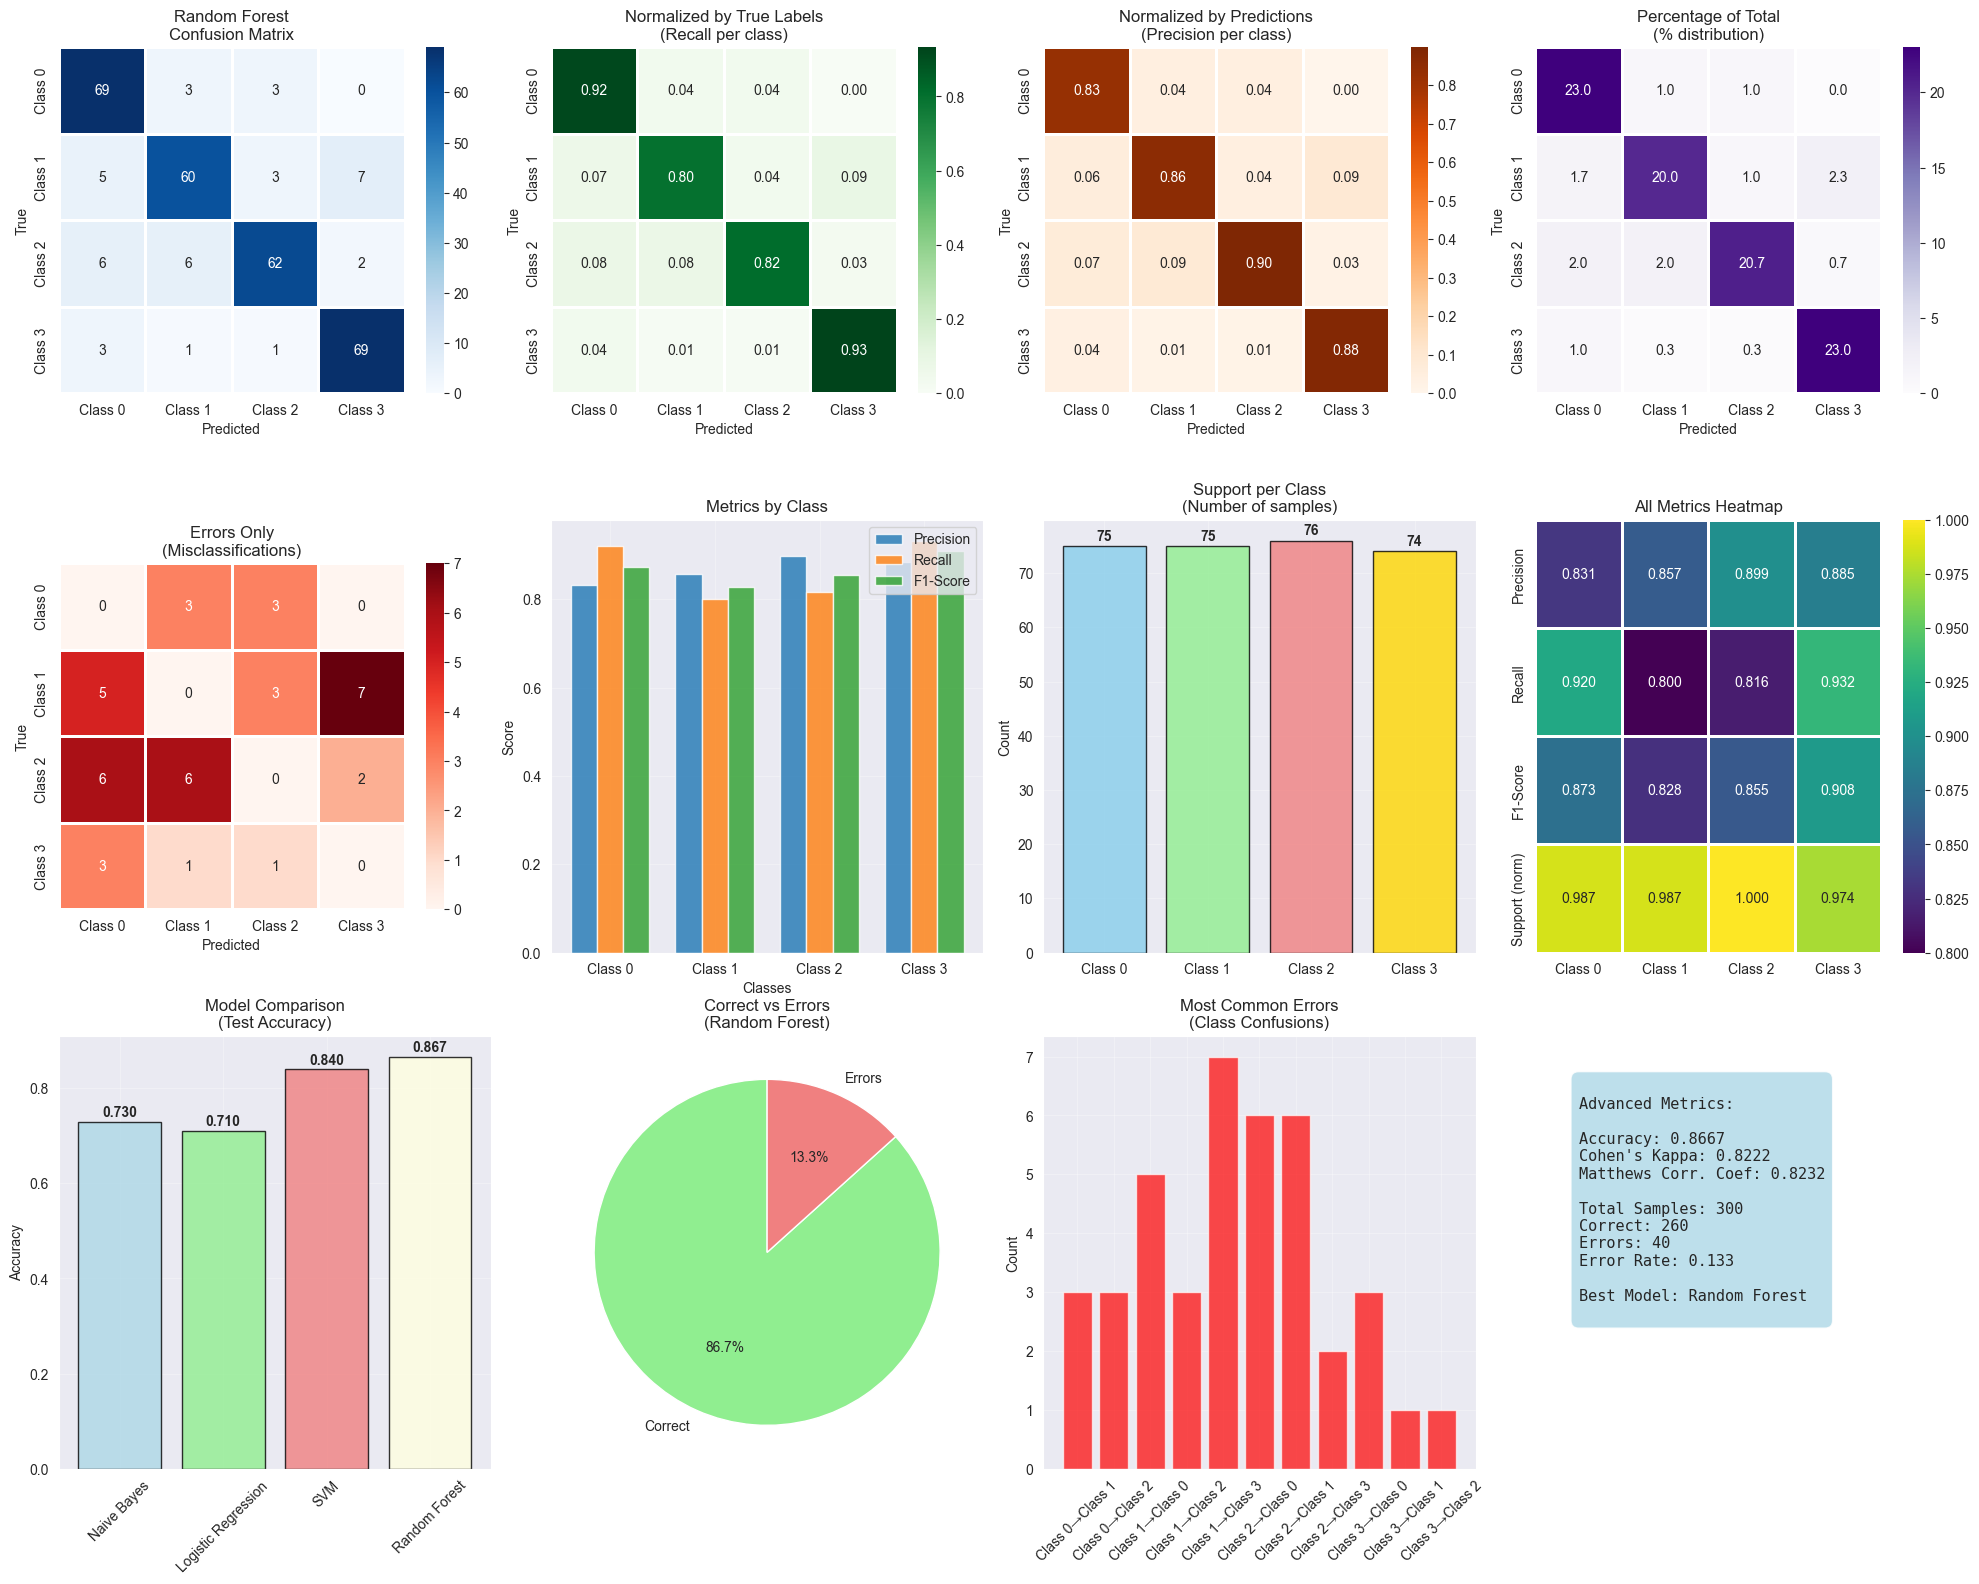


 DETAILED ERROR ANALYSIS:
 Overall metrics:
Accuracy: 0.8667
Cohen's Kappa: 0.8222 (agreement with random classifier)
Matthews Correlation Coefficient: 0.8232 (correlation between true and predicted)

 Interpretation of Cohen's Kappa:
   Excellent agreement


In [5]:
# %%
# =============================================================================
# CELL 5: Modern Analysis of Confusion Matrix
# =============================================================================
print(" MODERN ANALYSIS OF CONFUSION MATRIX")
print("=" * 45)

# Creating confusion matrix for the best model
cm_best = confusion_matrix(y_test, best_predictions)
class_names = [f'Class {i}' for i in range(len(np.unique(y)))]

print(f" Confusion Matrix for {best_model_name}:")
print(cm_best)

# Large visualization with multiple representations
fig = plt.figure(figsize=(20, 16))

# 1. Basic Confusion Matrix
ax1 = plt.subplot(3, 4, 1)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', square=True,
            linewidths=1, cbar_kws={"shrink": .8})
ax1.set_title(f'{best_model_name}\nConfusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('True')
ax1.set_xticklabels(class_names)
ax1.set_yticklabels(class_names)

# 2. Normalized by Rows (True Positive Rate)
cm_norm_rows = cm_best.astype('float') / cm_best.sum(axis=1)[:, np.newaxis]
ax2 = plt.subplot(3, 4, 2)
sns.heatmap(cm_norm_rows, annot=True, fmt='.2f', cmap='Greens', square=True,
            linewidths=1, cbar_kws={"shrink": .8})
ax2.set_title('Normalized by True Labels\n(Recall per class)')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('True')
ax2.set_xticklabels(class_names)
ax2.set_yticklabels(class_names)

# 3. Normalized by Columns (Precision)
cm_norm_cols = cm_best.astype('float') / cm_best.sum(axis=0)[np.newaxis, :]
ax3 = plt.subplot(3, 4, 3)
sns.heatmap(cm_norm_cols, annot=True, fmt='.2f', cmap='Oranges', square=True,
            linewidths=1, cbar_kws={"shrink": .8})
ax3.set_title('Normalized by Predictions\n(Precision per class)')
ax3.set_xlabel('Predicted')
ax3.set_ylabel('True')
ax3.set_xticklabels(class_names)
ax3.set_yticklabels(class_names)

# 4. Percentage of Total
cm_norm_total = cm_best.astype('float') / cm_best.sum() * 100
ax4 = plt.subplot(3, 4, 4)
sns.heatmap(cm_norm_total, annot=True, fmt='.1f', cmap='Purples', square=True,
            linewidths=1, cbar_kws={"shrink": .8})
ax4.set_title('Percentage of Total\n(% distribution)')
ax4.set_xlabel('Predicted')
ax4.set_ylabel('True')
ax4.set_xticklabels(class_names)
ax4.set_yticklabels(class_names)

# 5. Classification Errors (only incorrect predictions)
cm_errors = cm_best.copy()
np.fill_diagonal(cm_errors, 0)  # Removing correct predictions
ax5 = plt.subplot(3, 4, 5)
sns.heatmap(cm_errors, annot=True, fmt='d', cmap='Reds', square=True,
            linewidths=1, cbar_kws={"shrink": .8})
ax5.set_title('Errors Only\n(Misclassifications)')
ax5.set_xlabel('Predicted')
ax5.set_ylabel('True')
ax5.set_xticklabels(class_names)
ax5.set_yticklabels(class_names)

# 6. Metrics by Class (bar plot)
ax6 = plt.subplot(3, 4, 6)
precision, recall, f1, support = precision_recall_fscore_support(y_test, best_predictions)

x_pos = np.arange(len(class_names))
width = 0.25

ax6.bar(x_pos - width, precision, width, label='Precision', alpha=0.8)
ax6.bar(x_pos, recall, width, label='Recall', alpha=0.8)
ax6.bar(x_pos + width, f1, width, label='F1-Score', alpha=0.8)

ax6.set_xlabel('Classes')
ax6.set_ylabel('Score')
ax6.set_title('Metrics by Class')
ax6.set_xticks(x_pos)
ax6.set_xticklabels(class_names)
ax6.legend()
ax6.grid(True, alpha=0.3)

# 7. Support (number of samples) by classes
ax7 = plt.subplot(3, 4, 7)
bars = ax7.bar(class_names, support, color=['skyblue', 'lightgreen', 'lightcoral', 'gold'],
               alpha=0.8, edgecolor='black')
ax7.set_title('Support per Class\n(Number of samples)')
ax7.set_ylabel('Count')
ax7.grid(True, alpha=0.3)

# Adding values to the bars
for bar, s in zip(bars, support):
    height = bar.get_height()
    ax7.text(bar.get_x() + bar.get_width() / 2., height + 0.5,
             f'{s}', ha='center', va='bottom', fontweight='bold')

# 8. Heatmap of all metrics
ax8 = plt.subplot(3, 4, 8)
metrics_matrix = np.array([precision, recall, f1, support / support.max()])  # Normalizing support
metrics_labels = ['Precision', 'Recall', 'F1-Score', 'Support (norm)']
sns.heatmap(metrics_matrix, annot=True, fmt='.3f', cmap='viridis',
            xticklabels=class_names, yticklabels=metrics_labels,
            square=False, linewidths=1, ax=ax8)
ax8.set_title('All Metrics Heatmap')

# 9. Model Comparison
ax9 = plt.subplot(3, 4, 9)
model_names = [name for name in trained_models.keys()]
model_accuracies = [info['accuracy'] for info in trained_models.values()]

bars = ax9.bar(model_names, model_accuracies,
               color=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'],
               alpha=0.8, edgecolor='black')
ax9.set_title('Model Comparison\n(Test Accuracy)')
ax9.set_ylabel('Accuracy')
ax9.tick_params(axis='x', rotation=45)
ax9.grid(True, alpha=0.3)

# Adding values to the bars
for bar, acc in zip(bars, model_accuracies):
    height = bar.get_height()
    ax9.text(bar.get_x() + bar.get_width() / 2., height + 0.005,
             f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

# 10. Distribution of Errors by Types
ax10 = plt.subplot(3, 4, 10)
total_correct = np.trace(cm_best)
total_samples = cm_best.sum()
total_errors = total_samples - total_correct

error_types = ['Correct', 'Errors']
error_counts = [total_correct, total_errors]
colors_pie = ['lightgreen', 'lightcoral']

wedges, texts, autotexts = ax10.pie(error_counts, labels=error_types, colors=colors_pie,
                                    autopct='%1.1f%%', startangle=90)
ax10.set_title(f'Correct vs Errors\n({best_model_name})')

# 11. Detailed error analysis
ax11 = plt.subplot(3, 4, 11)
# Creating error matrix between classes
error_pairs = []
error_counts_pairs = []

for i in range(len(class_names)):
    for j in range(len(class_names)):
        if i != j and cm_best[i, j] > 0:
            error_pairs.append(f'{class_names[i]}→{class_names[j]}')
            error_counts_pairs.append(cm_best[i, j])

if error_pairs:
    bars = ax11.bar(range(len(error_pairs)), error_counts_pairs,
                    color='red', alpha=0.7)
    ax11.set_title('Most Common Errors\n(Class Confusions)')
    ax11.set_ylabel('Count')
    ax11.set_xticks(range(len(error_pairs)))
    ax11.set_xticklabels(error_pairs, rotation=45)
    ax11.grid(True, alpha=0.3)
else:
    ax11.text(0.5, 0.5, 'No Errors!', ha='center', va='center',
              transform=ax11.transAxes, fontsize=16, fontweight='bold')
    ax11.set_title('Perfect Classification!')

# 12. Cohen's Kappa and other metrics
ax12 = plt.subplot(3, 4, 12)
ax12.axis('off')

# Additional metrics
kappa = cohen_kappa_score(y_test, best_predictions)
mcc = matthews_corrcoef(y_test, best_predictions)
overall_accuracy = accuracy_score(y_test, best_predictions)

metrics_text = f"""
Advanced Metrics:

Accuracy: {overall_accuracy:.4f}
Cohen's Kappa: {kappa:.4f}
Matthews Corr. Coef: {mcc:.4f}

Total Samples: {len(y_test)}
Correct: {total_correct}
Errors: {total_errors}
Error Rate: {total_errors / len(y_test):.3f}

Best Model: {best_model_name}
"""

ax12.text(0.1, 0.9, metrics_text, transform=ax12.transAxes, fontsize=11,
          verticalalignment='top', fontfamily='monospace',
          bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))

plt.tight_layout()
plt.show()

# Detailed error analysis
print(f"\n DETAILED ERROR ANALYSIS:")
print("=" * 35)

print(f" Overall metrics:")
print(f"Accuracy: {overall_accuracy:.4f}")
print(f"Cohen's Kappa: {kappa:.4f} (agreement with random classifier)")
print(f"Matthews Correlation Coefficient: {mcc:.4f} (correlation between true and predicted)")

print(f"\n Interpretation of Cohen's Kappa:")
if kappa < 0:
    print("  ❌ Poor (worse than random)")
elif kappa < 0.2:
    print("  ⚠️ Weak agreement")
elif kappa < 0.4:
    print("   Satisfactory agreement")
elif kappa < 0.6:
    print("  ✅ Good agreement")
elif kappa < 0.8:
    print("   Very good agreement")
else:
    print("   Excellent agreement")


 COMPARISON OF CONFUSION MATRIX OF DIFFERENT MODELS


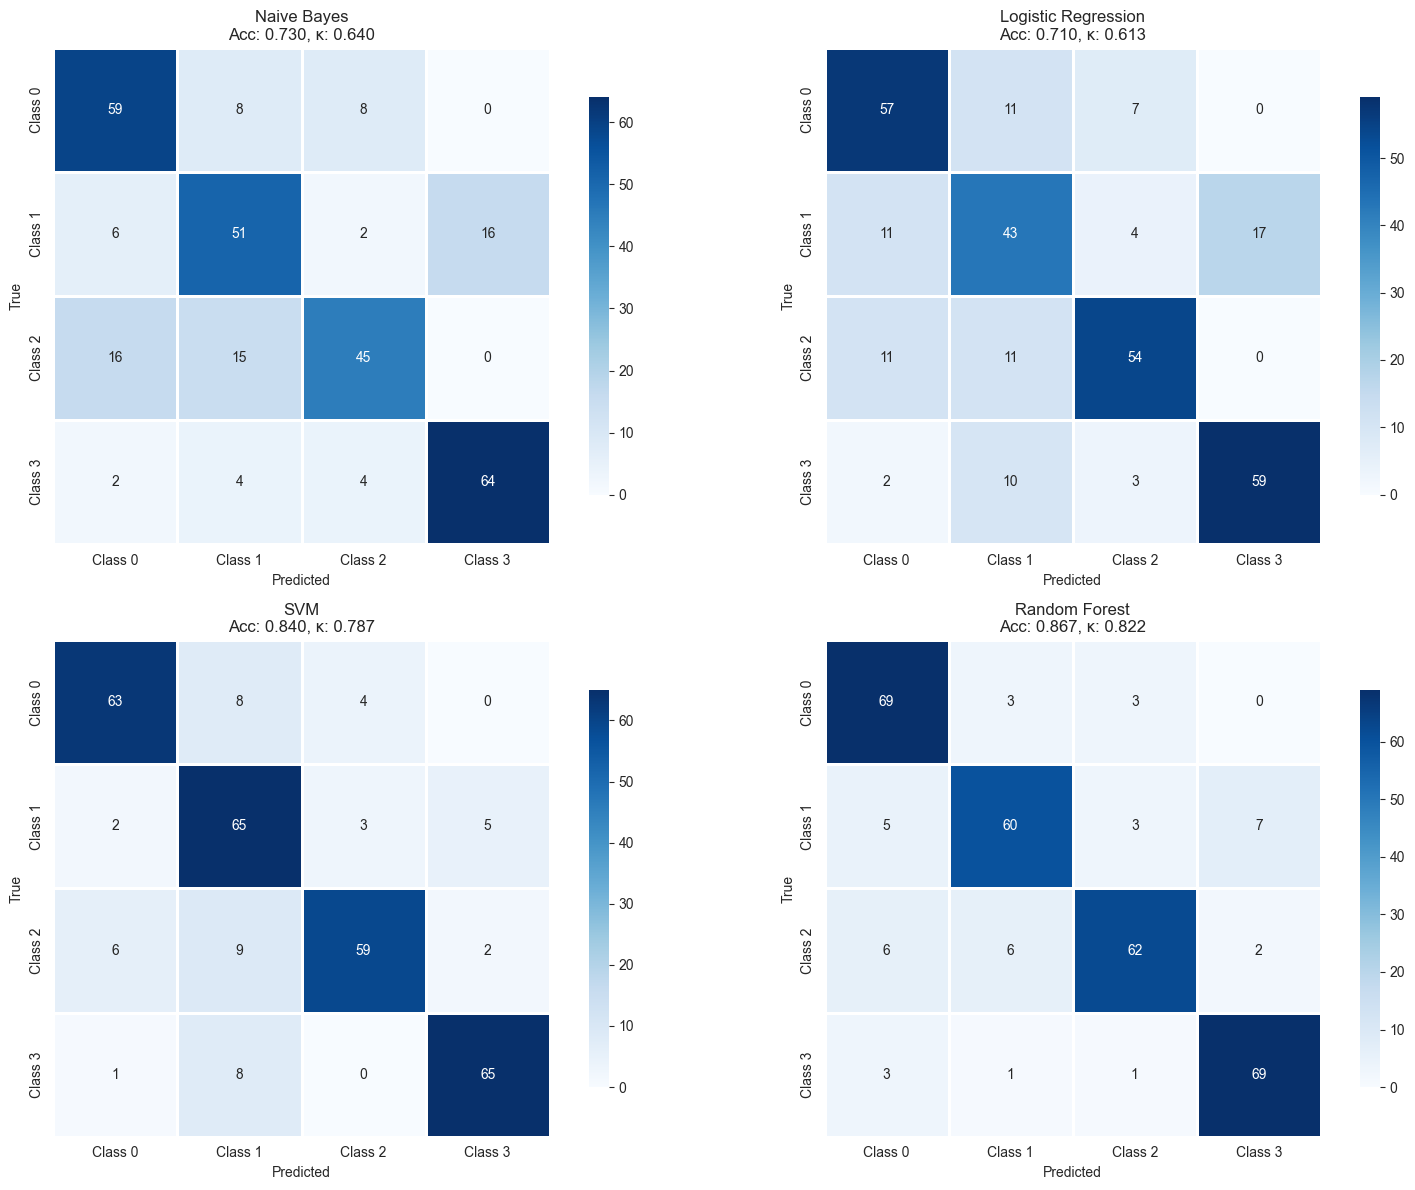


 Comparative metrics table of models:
                 Model  Accuracy  Precision  Recall  F1-Score  Cohen_Kappa  \
3        Random Forest    0.8667     0.8680  0.8667    0.8658       0.8222   
2                  SVM    0.8400     0.8485  0.8400    0.8414       0.7867   
0          Naive Bayes    0.7300     0.7317  0.7300    0.7273       0.6401   
1  Logistic Regression    0.7100     0.7119  0.7100    0.7101       0.6134   

   Total_Errors  
3            40  
2            48  
0            81  
1            87  


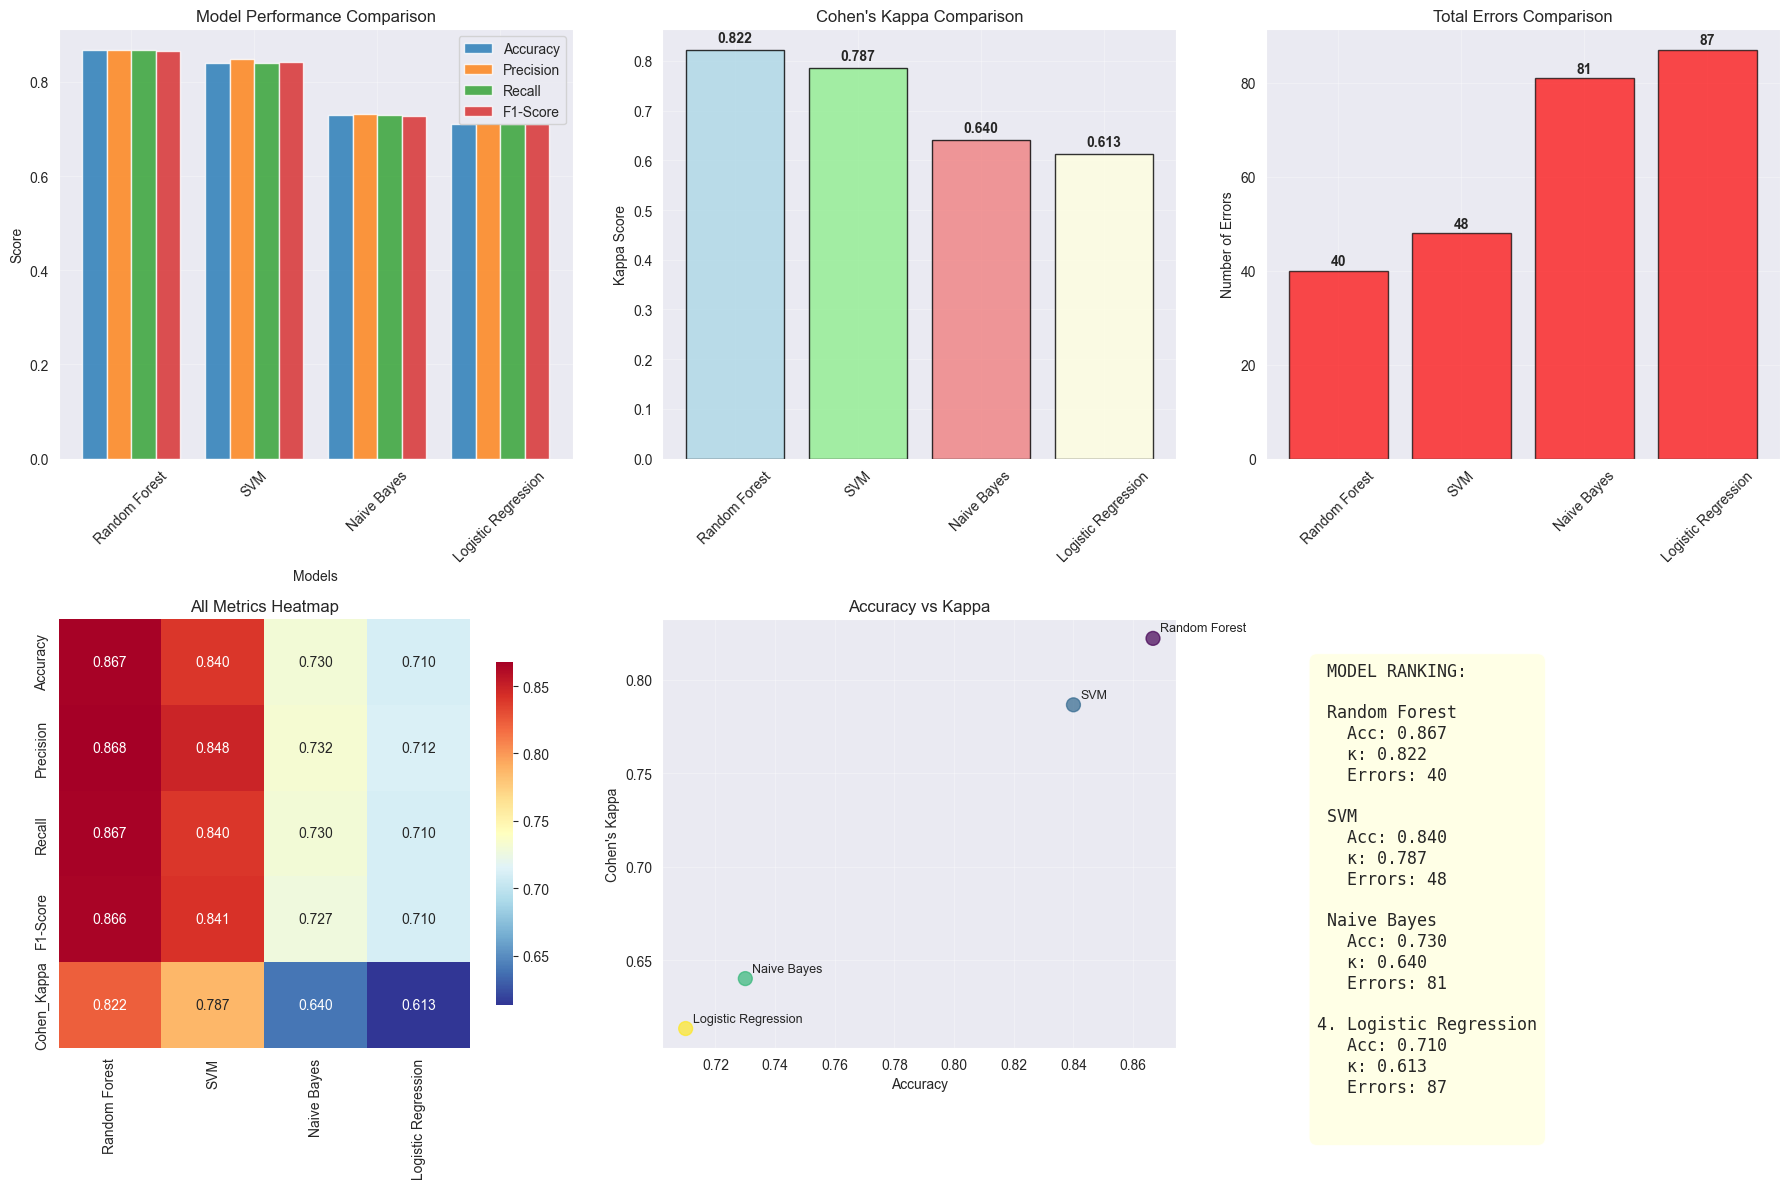


 FINAL COMPARISON:
 Best model: Random Forest
   Accuracy: 0.8667
   Cohen's Kappa: 0.8222
   Errors: 40

 Worst model: Logistic Regression
   Accuracy: 0.7100
   Cohen's Kappa: 0.6134
   Errors: 87

 Improvement of the best model: +22.1%


In [6]:
# %%
# =============================================================================
# CELL 6: Comparison of Confusion Matrix of different models
# =============================================================================
print(" COMPARISON OF CONFUSION MATRIX OF DIFFERENT MODELS")
print("=" * 50)

# Creating confusion matrices for all models
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

model_cms = {}
model_metrics = {}

for idx, (model_name, model_info) in enumerate(trained_models.items()):
    if idx < 4:  # Showing only the first 4 models
        predictions = model_info['predictions']
        cm = confusion_matrix(y_test, predictions)
        model_cms[model_name] = cm

        # Calculating metrics
        accuracy = accuracy_score(y_test, predictions)
        kappa = cohen_kappa_score(y_test, predictions)

        model_metrics[model_name] = {
            'accuracy': accuracy,
            'kappa': kappa,
            'total_errors': cm.sum() - np.trace(cm)
        }

        # Visualization
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True,
                    linewidths=1, cbar_kws={"shrink": .8}, ax=axes[idx])
        axes[idx].set_title(f'{model_name}\nAcc: {accuracy:.3f}, κ: {kappa:.3f}')
        axes[idx].set_xlabel('Predicted')
        axes[idx].set_ylabel('True')
        axes[idx].set_xticklabels(class_names)
        axes[idx].set_yticklabels(class_names)

plt.tight_layout()
plt.show()

# Comparative metrics table
print(f"\n Comparative metrics table of models:")
print("=" * 50)

comparison_data = []
for model_name, metrics in model_metrics.items():
    predictions = trained_models[model_name]['predictions']
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, predictions, average='weighted')

    comparison_data.append({
        'Model': model_name,
        'Accuracy': metrics['accuracy'],
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Cohen_Kappa': metrics['kappa'],
        'Total_Errors': metrics['total_errors']
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Accuracy', ascending=False)
print(comparison_df.round(4))

# Visualization of comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Comparison of main metrics
metrics_cols = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x_pos = np.arange(len(comparison_df))

for i, metric in enumerate(metrics_cols):
    axes[0, 0].bar(x_pos + i * 0.2, comparison_df[metric], width=0.2,
                   label=metric, alpha=0.8)

axes[0, 0].set_xlabel('Models')
axes[0, 0].set_ylabel('Score')
axes[0, 0].set_title('Model Performance Comparison')
axes[0, 0].set_xticks(x_pos + 0.3)
axes[0, 0].set_xticklabels(comparison_df['Model'], rotation=45)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Cohen's Kappa comparison
bars = axes[0, 1].bar(comparison_df['Model'], comparison_df['Cohen_Kappa'],
                      color=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'],
                      alpha=0.8, edgecolor='black')
axes[0, 1].set_title("Cohen's Kappa Comparison")
axes[0, 1].set_ylabel('Kappa Score')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# Adding values on bars
for bar, kappa in zip(bars, comparison_df['Cohen_Kappa']):
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width() / 2., height + 0.01,
                    f'{kappa:.3f}', ha='center', va='bottom', fontweight='bold')

# 3. Number of errors
bars = axes[0, 2].bar(comparison_df['Model'], comparison_df['Total_Errors'],
                      color='red', alpha=0.7, edgecolor='black')
axes[0, 2].set_title('Total Errors Comparison')
axes[0, 2].set_ylabel('Number of Errors')
axes[0, 2].tick_params(axis='x', rotation=45)
axes[0, 2].grid(True, alpha=0.3)

for bar, errors in zip(bars, comparison_df['Total_Errors']):
    height = bar.get_height()
    axes[0, 2].text(bar.get_x() + bar.get_width() / 2., height + 0.5,
                    f'{errors}', ha='center', va='bottom', fontweight='bold')

# 4. Heatmap of all metrics
metrics_matrix = comparison_df[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Cohen_Kappa']].T
sns.heatmap(metrics_matrix, annot=True, fmt='.3f', cmap='RdYlBu_r',
            xticklabels=comparison_df['Model'], cbar_kws={"shrink": .8}, ax=axes[1, 0])
axes[1, 0].set_title('All Metrics Heatmap')

# 5. Scatter plot: Accuracy vs Kappa
axes[1, 1].scatter(comparison_df['Accuracy'], comparison_df['Cohen_Kappa'],
                   s=100, alpha=0.7, c=range(len(comparison_df)), cmap='viridis')

for i, model in enumerate(comparison_df['Model']):
    axes[1, 1].annotate(model,
                        (comparison_df.iloc[i]['Accuracy'], comparison_df.iloc[i]['Cohen_Kappa']),
                        xytext=(5, 5), textcoords='offset points', fontsize=9)

axes[1, 1].set_xlabel('Accuracy')
axes[1, 1].set_ylabel("Cohen's Kappa")
axes[1, 1].set_title('Accuracy vs Kappa')
axes[1, 1].grid(True, alpha=0.3)

# 6. Model ranking
axes[1, 2].axis('off')

ranking_text = " MODEL RANKING:\n\n"
for i, (_, row) in enumerate(comparison_df.iterrows(), 1):
    medal = "" if i == 1 else "" if i == 2 else "" if i == 3 else f"{i}."
    ranking_text += f"{medal} {row['Model']}\n"
    ranking_text += f"   Acc: {row['Accuracy']:.3f}\n"
    ranking_text += f"   κ: {row['Cohen_Kappa']:.3f}\n"
    ranking_text += f"   Errors: {row['Total_Errors']}\n\n"

axes[1, 2].text(0.1, 0.9, ranking_text, transform=axes[1, 2].transAxes,
                fontsize=12, verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.8))

plt.tight_layout()
plt.show()

print(f"\n FINAL COMPARISON:")
print("=" * 25)

best_model = comparison_df.iloc[0]
worst_model = comparison_df.iloc[-1]

print(f" Best model: {best_model['Model']}")
print(f"   Accuracy: {best_model['Accuracy']:.4f}")
print(f"   Cohen's Kappa: {best_model['Cohen_Kappa']:.4f}")
print(f"   Errors: {best_model['Total_Errors']}")

print(f"\n Worst model: {worst_model['Model']}")
print(f"   Accuracy: {worst_model['Accuracy']:.4f}")
print(f"   Cohen's Kappa: {worst_model['Cohen_Kappa']:.4f}")
print(f"   Errors: {worst_model['Total_Errors']}")

improvement = ((best_model['Accuracy'] - worst_model['Accuracy']) / worst_model['Accuracy']) * 100
print(f"\n Improvement of the best model: +{improvement:.1f}%")


 ADVANCED TECHNIQUES FOR CONFUSION MATRIX ANALYSIS
 Advanced analysis for model: Random Forest

 Multilabel Confusion Matrix (One-vs-All):
Shape: (4, 2, 2) (number_of_classes, 2, 2)


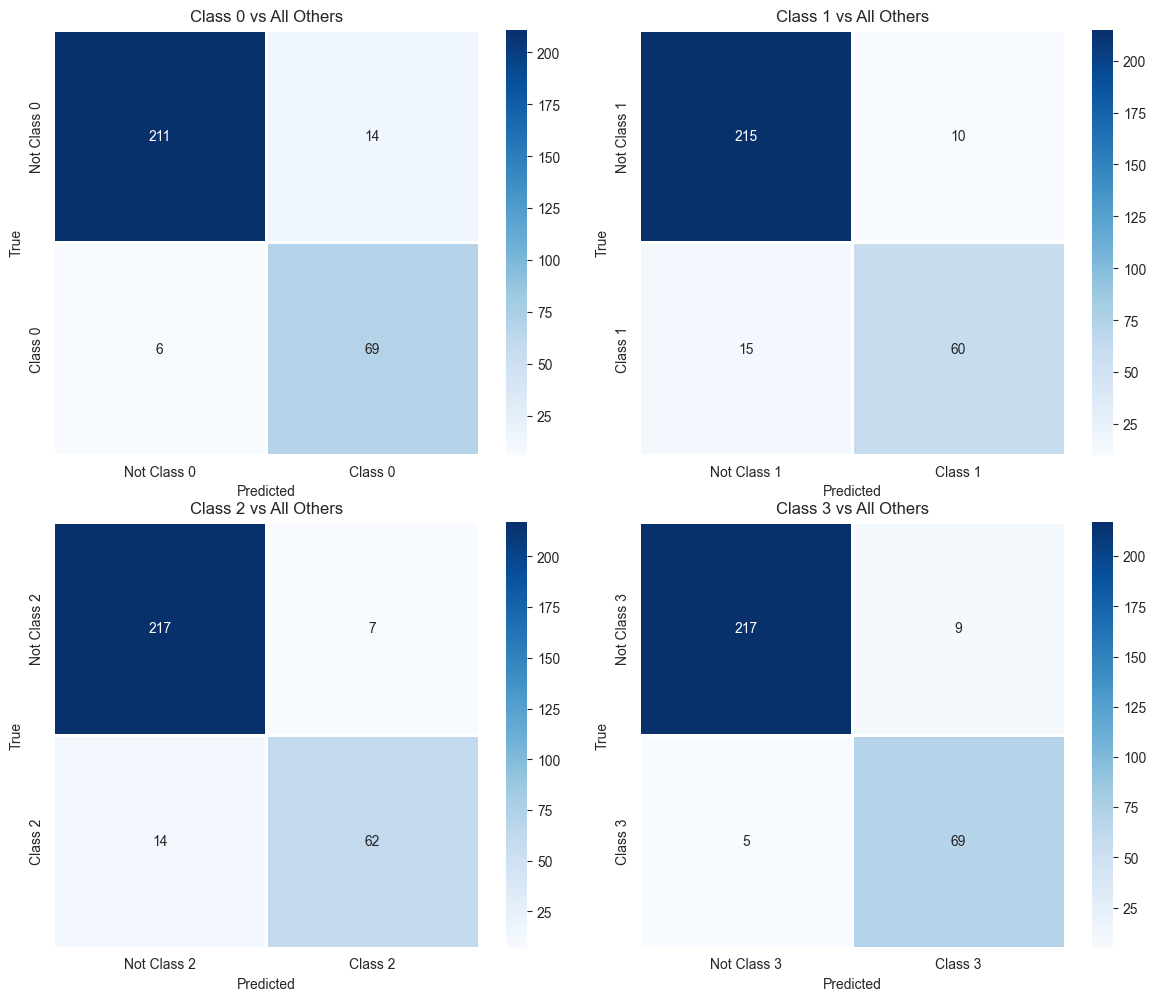


 Analysis of Confusion Matrix Structure:
Correct predictions (diagonal): 260
Incorrect predictions (off-diagonal): 40
Total number of predictions: 300
Proportion of correct predictions: 0.8667

 Analysis of error symmetry:


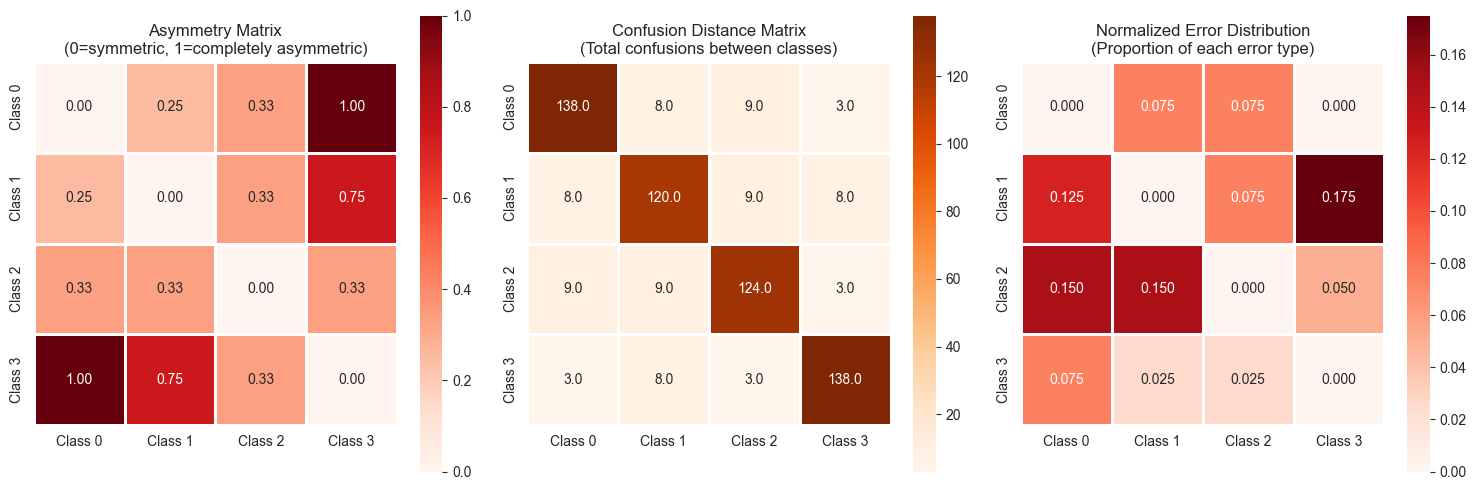


 Statistical analysis of errors:
Top classification errors:
  True_Class Predicted_Class  Count  Percentage
4    Class 1         Class 3      7        17.5
5    Class 2         Class 0      6        15.0
6    Class 2         Class 1      6        15.0
2    Class 1         Class 0      5        12.5
0    Class 0         Class 1      3         7.5
1    Class 0         Class 2      3         7.5
3    Class 1         Class 2      3         7.5
8    Class 3         Class 0      3         7.5
7    Class 2         Class 3      2         5.0
9    Class 3         Class 1      1         2.5

 Analysis of error direction:
Class 0:
  True samples: 75
  Predicted samples: 83
  Errors FROM class: 6 (missed)
  Errors TO class: 14 (false alarms)
  Recall: 0.920
  Precision: 0.831

Class 1:
  True samples: 75
  Predicted samples: 70
  Errors FROM class: 15 (missed)
  Errors TO class: 10 (false alarms)
  Recall: 0.800
  Precision: 0.857

Class 2:
  True samples: 76
  Predicted samples: 69
  Errors FROM

In [7]:
# %%
# =============================================================================
# CELL 7: Advanced Techniques for Confusion Matrix Analysis
# =============================================================================
print(" ADVANCED TECHNIQUES FOR CONFUSION MATRIX ANALYSIS")
print("=" * 55)

# Using the best model for advanced analysis
best_model_obj = trained_models[best_model_name]['model']
best_cm = confusion_matrix(y_test, best_predictions)

print(f" Advanced analysis for model: {best_model_name}")

# 1. Multiclass confusion matrix for each class (One-vs-All)
print(f"\n Multilabel Confusion Matrix (One-vs-All):")

mlb_cm = multilabel_confusion_matrix(y_test, best_predictions)
print(f"Shape: {mlb_cm.shape} (number_of_classes, 2, 2)")

# Visualization of multilabel confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (class_name, cm_binary) in enumerate(zip(class_names, mlb_cm)):
    sns.heatmap(cm_binary, annot=True, fmt='d', cmap='Blues',
                square=True, linewidths=1, ax=axes[i])
    axes[i].set_title(f'{class_name} vs All Others')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')
    axes[i].set_xticklabels(['Not ' + class_name, class_name])
    axes[i].set_yticklabels(['Not ' + class_name, class_name])

plt.tight_layout()
plt.show()

# 2. Analysis of diagonal and off-diagonal elements
print(f"\n Analysis of Confusion Matrix Structure:")

diagonal_sum = np.trace(best_cm)
off_diagonal_sum = best_cm.sum() - diagonal_sum
total_sum = best_cm.sum()

print(f"Correct predictions (diagonal): {diagonal_sum}")
print(f"Incorrect predictions (off-diagonal): {off_diagonal_sum}")
print(f"Total number of predictions: {total_sum}")
print(f"Proportion of correct predictions: {diagonal_sum / total_sum:.4f}")

# 3. Analysis of error symmetry
print(f"\n Analysis of error symmetry:")

# Creating the error symmetry matrix
symmetry_matrix = np.zeros_like(best_cm, dtype=float)
for i in range(len(class_names)):
    for j in range(len(class_names)):
        if i != j:
            # Comparing errors i->j and j->i
            error_ij = best_cm[i, j]
            error_ji = best_cm[j, i]
            if error_ij + error_ji > 0:
                symmetry_matrix[i, j] = abs(error_ij - error_ji) / (error_ij + error_ji)

# Visualization of symmetry
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(symmetry_matrix, annot=True, fmt='.2f', cmap='Reds',
            square=True, linewidths=1, xticklabels=class_names, yticklabels=class_names)
plt.title('Asymmetry Matrix\n(0=symmetric, 1=completely asymmetric)')

# 4. Analysis of distances between predictions and true labels
plt.subplot(1, 3, 2)

# Creating a "distance" matrix between classes (how many errors between each pair)
distance_matrix = np.zeros((len(class_names), len(class_names)))
for i in range(len(class_names)):
    for j in range(len(class_names)):
        distance_matrix[i, j] = best_cm[i, j] + best_cm[j, i]

sns.heatmap(distance_matrix, annot=True, fmt='.1f', cmap='Oranges',
            square=True, linewidths=1, xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Distance Matrix\n(Total confusions between classes)')

# 5. Normalized error matrix (excluding diagonal)
plt.subplot(1, 3, 3)
error_only_matrix = best_cm.copy().astype(float)
np.fill_diagonal(error_only_matrix, 0)
error_sum = error_only_matrix.sum()

if error_sum > 0:
    error_normalized = error_only_matrix / error_sum
    sns.heatmap(error_normalized, annot=True, fmt='.3f', cmap='Reds',
                square=True, linewidths=1, xticklabels=class_names, yticklabels=class_names)
    plt.title('Normalized Error Distribution\n(Proportion of each error type)')
else:
    plt.text(0.5, 0.5, 'No Errors!', ha='center', va='center', fontsize=16, fontweight='bold')
    plt.title('Perfect Classification!')

plt.tight_layout()
plt.show()

# 6. Statistical analysis of errors
print(f"\n Statistical analysis of errors:")

if off_diagonal_sum > 0:
    # Finding the most frequent errors
    error_pairs = []
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            if i != j and best_cm[i, j] > 0:
                error_pairs.append({
                    'True_Class': class_names[i],
                    'Predicted_Class': class_names[j],
                    'Count': best_cm[i, j],
                    'Percentage': best_cm[i, j] / off_diagonal_sum * 100
                })

    error_df = pd.DataFrame(error_pairs)
    error_df = error_df.sort_values('Count', ascending=False)

    print(f"Top classification errors:")
    print(error_df.head(10))

    # Analysis of error direction
    print(f"\n Analysis of error direction:")
    for class_name in class_names:
        class_idx = class_names.index(class_name)

        # Errors FROM this class (false negatives from this class perspective)
        errors_from = sum(best_cm[class_idx, j] for j in range(len(class_names)) if j != class_idx)

        # Errors TO this class (false positives to this class)
        errors_to = sum(best_cm[i, class_idx] for i in range(len(class_names)) if i != class_idx)

        true_count = sum(1 for y in y_test if y == class_idx)
        pred_count = sum(1 for y in best_predictions if y == class_idx)

        print(f"{class_name}:")
        print(f"  True samples: {true_count}")
        print(f"  Predicted samples: {pred_count}")
        print(f"  Errors FROM class: {errors_from} (missed)")
        print(f"  Errors TO class: {errors_to} (false alarms)")

        if true_count > 0:
            recall = (true_count - errors_from) / true_count
            print(f"  Recall: {recall:.3f}")

        if pred_count > 0:
            precision = (pred_count - errors_to) / pred_count
            print(f"  Precision: {precision:.3f}")

        print()

else:
    print(" No classification errors!")

# 7. Creating an interactive report
print(f"\n INTERACTIVE CONFUSION MATRIX REPORT:")
print("=" * 50)

report_data = {
    'Model': best_model_name,
    'Overall Accuracy': f"{accuracy_score(y_test, best_predictions):.4f}",
    'Cohen\'s Kappa': f"{cohen_kappa_score(y_test, best_predictions):.4f}",
    'Matthews Corr Coef': f"{matthews_corrcoef(y_test, best_predictions):.4f}",
    'Total Samples': len(y_test),
    'Correct Predictions': diagonal_sum,
    'Errors': off_diagonal_sum,
    'Error Rate': f"{off_diagonal_sum / len(y_test):.4f}"
}

print("Key metrics:")
for key, value in report_data.items():
    print(f"  {key}: {value}")

# Detailed class report
print(f"\nDetailed class report:")
precision, recall, f1, support = precision_recall_fscore_support(y_test, best_predictions)

class_report_data = []
for i, class_name in enumerate(class_names):
    class_report_data.append({
        'Class': class_name,
        'Precision': f"{precision[i]:.3f}",
        'Recall': f"{recall[i]:.3f}",
        'F1-Score': f"{f1[i]:.3f}",
        'Support': support[i]
    })

class_report_df = pd.DataFrame(class_report_data)
print(class_report_df)


In [8]:
# %%
# =============================================================================
# CELL 8: Practical Conclusions and Recommendations
# =============================================================================
print(" PRACTICAL CONCLUSIONS AND RECOMMENDATIONS")
print("=" * 45)

print(" Main results of the analysis:")
print("=" * 35)

# Final statistics
final_stats = {
    'Best model': best_model_name,
    'Accuracy': f"{accuracy_score(y_test, best_predictions):.4f}",
    'Cohen\'s Kappa': f"{cohen_kappa_score(y_test, best_predictions):.4f}",
    'Total samples': len(y_test),
    'Number of classes': len(class_names),
    'Total number of errors': off_diagonal_sum,
    'Error rate': f"{off_diagonal_sum / len(y_test) * 100:.1f}%"
}

for key, value in final_stats.items():
    print(f"✅ {key}: {value}")

print(f"\n Key observations about the Confusion Matrix:")
observations = [
    " Confusion Matrix - the main tool for classification analysis",
    " Diagonal elements show correct predictions",
    "❌ Non-diagonal elements show classification errors",
    "⚖️ Normalization helps analyze quality by classes",
    " Symmetry analysis reveals systematic errors",
    " Cohen's Kappa accounts for random coincidences",
    " Matthews Correlation is better for unbalanced data",
    " Multilabel CM shows binary characteristics of each class"
]

for obs in observations:
    print(f"  {obs}")

print(f"\n Improvements compared to the original code:")
print("=" * 55)

improvements = [
    " Modern multicolor visualization with multiple representations",
    " Comparison of different types of normalization CM",
    " Error-only analysis (error-only matrices)",
    " Comparison of several models simultaneously",
    " Multilabel confusion matrices (One-vs-All)",
    " Analysis of symmetry and direction of errors",
    " Detailed statistical reports",
    "⚖️ Advanced metrics (Cohen's Kappa, Matthews Corr)",
    " Interactive graphs with annotations",
    " Theoretical explanations of all metrics",
    " Analysis of error structure and recommendations for improvement"
]

for improvement in improvements:
    print(f"  {improvement}")

print(f"\n When to use different representations of CM:")
print("=" * 55)

use_cases = [
    " Standard CM: overall performance overview",
    " Row-normalized: analysis of Recall by classes",
    " Column-normalized: analysis of Precision by classes",
    " Percentage of total: distribution of predictions",
    "❌ Error-only: focus on problematic areas",
    " Multilabel: detailed analysis of each class vs others",
    "⚖️ Heatmap of metrics: model comparison",
    " Pivot tables: official reporting"
]

for use_case in use_cases:
    print(f"  {use_case}")

print(f"\n⚠️ Common mistakes in interpreting CM:")
print("=" * 45)

common_mistakes = [
    "❌ Ignoring class imbalance in analysis",
    " Focus only on overall accuracy without class analysis",
    " Incorrect interpretation of normalized matrices",
    "⚖️ Ignoring statistical significance in small samples",
    " Mixing Precision and Recall",
    " Not accounting for domain specifics when assessing error types"
]

for mistake in common_mistakes:
    print(f"  {mistake}")

print(f"\n Recommendations for improving models:")
print("=" * 45)

recommendations = [
    " Analyze specific types of errors, not just overall accuracy",
    "⚖️ Use stratified sampling for unbalanced data",
    " Focus on metrics important for your task (Precision vs Recall)",
    " Explore patterns in errors between specific classes",
    " Use ensembles to reduce specific types of errors",
    " Adjust prediction thresholds to optimize desired metrics",
    " Collect more data for problematic classes",
    " Apply techniques for handling class imbalance"
]

for rec in recommendations:
    print(f"  {rec}")

print(f"\n Next steps in studying:")
print("=" * 35)

next_steps = [
    " car.py - application on real car data",
    " income.py - classification of population incomes",
    " ROC-AUC analysis for classification thresholds",
    "⚖️ Working with unbalanced classes",
    " Cost-sensitive learning",
    " Calibration curves for probabilistic models",
    " Feature importance analysis",
    " Ensemble methods to improve problematic classes"
]

for step in next_steps:
    print(f"  {step}")

print(f"\n✅ Confusion Matrix studied in detail!")
print(f" Now you can professionally analyze the quality of any classification model")
print(f" Ready for the next practical example!")

# Saving final results
cm_analysis_summary = {
    'best_model': best_model_name,
    'best_accuracy': accuracy_score(y_test, best_predictions),
    'best_kappa': cohen_kappa_score(y_test, best_predictions),
    'confusion_matrix': best_cm,
    'class_names': class_names,
    'model_comparison': comparison_df,
    'total_errors': off_diagonal_sum,
    'perfect_classification': off_diagonal_sum == 0
}

print(f"\n Analysis results saved for the next examples")


 PRACTICAL CONCLUSIONS AND RECOMMENDATIONS
 Main results of the analysis:
✅ Best model: Random Forest
✅ Accuracy: 0.8667
✅ Cohen's Kappa: 0.8222
✅ Total samples: 300
✅ Number of classes: 4
✅ Total number of errors: 40
✅ Error rate: 13.3%

 Key observations about the Confusion Matrix:
   Confusion Matrix - the main tool for classification analysis
   Diagonal elements show correct predictions
  ❌ Non-diagonal elements show classification errors
  ⚖️ Normalization helps analyze quality by classes
   Symmetry analysis reveals systematic errors
   Cohen's Kappa accounts for random coincidences
   Matthews Correlation is better for unbalanced data
   Multilabel CM shows binary characteristics of each class

 Improvements compared to the original code:
   Modern multicolor visualization with multiple representations
   Comparison of different types of normalization CM
   Error-only analysis (error-only matrices)
   Comparison of several models simultaneously
   Multilabel confusion matrices 